# MAE6226 Homework 04

Li Lin

In [2]:
import math
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

## Problem 1
### Question a

Obviously, the radius of the circle is actually the distance from the stagnation point to the location of doublet. Since the stagnation point only locates at x-axis, we only need to consider the $u$ component of its velocity, and we have $y = 0$ in that expression, that

$u = -\frac{\kappa}{2\pi}\frac{x^2-0}{(x^2+0)^2} = -\frac{\kappa}{2{\pi}x^2}$, 

yields

$x = \sqrt{\frac{\kappa}{2{\pi}U_\infty}}$, which is the distance between the stagnation point and the doublet, and the redius of the circle.

### Question b

In [3]:
N = 50                                
x0, xn = -4.0, 4.0            
y0, yn = -2.0, 2.0            
x = np.linspace(x0, xn, N)    
y = np.linspace(y0, yn, N)    
X, Y = np.meshgrid(x, y)              

Based on the fomula derived in Question a, $\kappa = 2\pi$ can yield a unit circle in $U_\infty = 1$. 

In [4]:
kappa = 2*math.pi
x_d, y_d = 0.0, 0.0

In [5]:
def velocity_doublet(kappa, x_d, y_d, X, Y):
    """Returns the velocity field of a doublet,
    where
    kappa - strength of the doublet,
    x_d, y_d - coordinates of the doublet,
    X, Y - mesh grid.
    """
    u = -kappa/(2*math.pi)*((X-x_d)**2-(Y-y_d)**2)/((X-x_d)**2+(Y-y_d)**2)**2
    v = -kappa/(2*math.pi)*2*(X-x_d)*(Y-y_d)/((X-x_d)**2+(Y-y_d)**2)**2
    
    return u, v

In [6]:
def stream_function_doublet(kappa, x_d, y_d, X, Y):
    """Returns the stream-function of a doublet,
    where
    kappa - strength of the doublet,
    x_d, y_d - coordinates of the doublet,
    X, Y - mesh grid.
    """
    psi = -kappa/(2*math.pi)*(Y-y_d)/((X-x_d)**2+(Y-y_d)**2)
    
    return psi

In [7]:
u_d, v_d = velocity_doublet(kappa, x_d, y_d, X, Y)
psi_d = stream_function_doublet(kappa, x_d, y_d, X, Y)
u_inf = 1.0
u_freestream = u_inf*np.ones((N, N), dtype=float)
v_freestream = np.zeros((N, N), dtype=float)
psi_freestream = u_inf*Y
u = u_freestream + u_d
v = v_freestream + v_d
psi = psi_freestream + psi_d

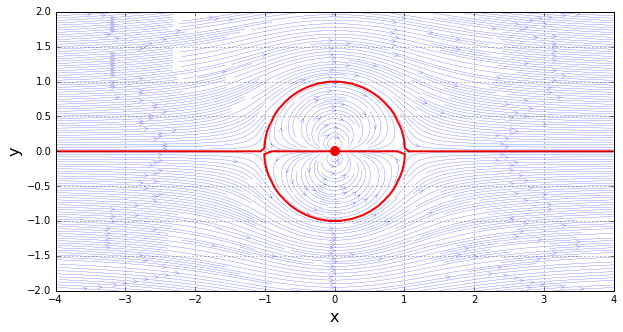

In [8]:
fsize = 10
plt.figure(figsize=(fsize, (yn-y0)/(xn-x0)*fsize))
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.xlim(x0, xn)
plt.ylim(y0, yn)
plt.streamplot(X, Y, u, v, density=4, linewidth=0.2, arrowsize=1, arrowstyle='->')
plt.contour(X, Y, psi, levels=[0.], colors='red', linewidths=2, linestyles='solid')
plt.scatter(x_d, y_d, color='red', s=80, marker='o');
plt.grid('on')

## Problem 2
### Question a

Since $x = r{\cos}\theta$ and $y = r{\sin}\theta$, the expression of doublet velocity field can be written as

$u_d = -\frac{\kappa}{2\pi}\frac{\cos2\theta}{r^2}$ and $v_d = -\frac{\kappa}{2\pi}\frac{\sin2\theta}{r^2}$.

Note that $\frac{kappa}{2{\pi}r^2} = U_\infty$, thus we have

$u_d = -U_{\infty}\cos2\theta$ and $v_d = -U_{\infty}\sin2\theta$.

$C_p = 1-(\frac{U}{U_\infty})^2 = 1-(\frac{u^2+v^2}{U_\infty}) = 1-[\frac{(u_d+U_\infty)^2+v^2}{U-\infty}] = 1-\frac{(-U_{\infty}\cos2\theta+U_\infty)^2+U_\infty^2\sin^22\theta}{U_\infty} = 1-\cos^22\theta-1+2\cos2\theta-\sin^22\theta = 1-4\sin^2\theta$.


### Question b

In [9]:
N = 50                                
r0, rn = 0.0, 3.0            
theta0, thetan = -math.pi, math.pi            
r = np.linspace(r0, rn, N)    
theta = np.linspace(theta0, thetan, N)    
R, Theta = np.meshgrid(r, theta)  

/home/gil/anaconda3/lib/python3.4/site-packages/ipykernel/__main__.py:1: RuntimeWarning: divide by zero encountered in true_divide
  if __name__ == '__main__':
/home/gil/anaconda3/lib/python3.4/site-packages/ipykernel/__main__.py:2: RuntimeWarning: divide by zero encountered in true_divide
  from ipykernel import kernelapp as app


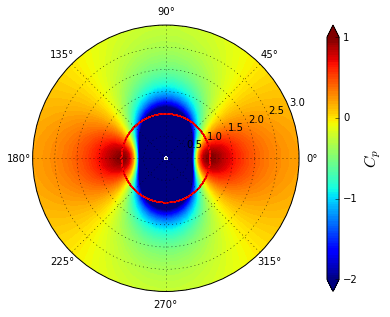

In [24]:
u = -kappa/(2*math.pi)*np.cos(2*Theta)/(R**2)+u_inf
v = -kappa/(2*math.pi)*np.sin(2*Theta)/(R**2)
C_p = 1.0 - (u**2+v**2)/(u_inf**2)
fsize = 10
plt.figure(figsize=(fsize, (rn-r0)/(thetan-theta0)*fsize))
ax = plt.subplot(111, projection='polar')
contf = plt.contourf(Theta, R, C_p, levels=np.linspace(-2.0, 1.0, 100), extend='both');
cbar = plt.colorbar(contf)
cbar.set_label('$C_p$', fontsize=16)
cbar.set_ticks([-2.0, -1.0, 0.0, 1.0])
Rc = np.ones(N);
plt.plot(Theta,Rc, color = 'red');

### Question c

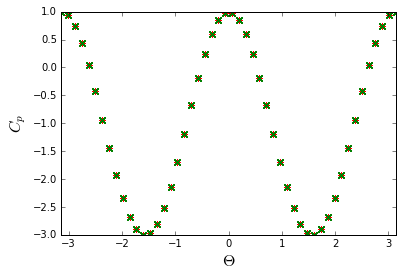

In [27]:
C_p_theo = 1-4*(np.sin(Theta))**2 
u = -kappa/(2*math.pi)*np.cos(2*Theta)/(Rc**2)+u_inf
v = -kappa/(2*math.pi)*np.sin(2*Theta)/(Rc**2)
C_p = 1.0 - (u**2+v**2)/(u_inf**2)
fsize = 10
plt.xlabel('$\Theta$', fontsize=16)
plt.ylabel('$C_p$', fontsize=16)
plt.xlim(theta0, thetan)
plt.plot(Theta, C_p, 'r+', Theta, C_p_theo, 'gx');

It is clear that the $C_p$ on the circle surface (red +) matches the theoretical result (green x) well.